# **Separación de máscaras binarias**

Autor: Fco Javier Yagüe Izquierdo
Notebook que utiliza las *pycococreatortools* para individualizar las máscaras binarias del proyecto en una imagen única por defecto que relacione la imagen original en el nombre

(Ejecutado en Google Colab)

In [ ]:
import sys
import os
sys.path.append('./pycococreator-0.2.0/pycococreatortools')
from pycococreatortools import *
from PIL import Image
import numpy as np
from numpy import asarray
import PIL.ImageOps  
from skimage import data
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb

In [ ]:
nombre = './IMG/Welding/J0001/masks/J0001_0009_0.png'
image = Image.open(nombre)
data = asarray(image.convert("L"))
data = np.where(data > 128, 255, 0)
print(type(data))
print(data.shape)

image2 = Image.fromarray(data)
print(type(image2))

print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(570, 736)
<class 'PIL.Image.Image'>
I
(736, 570)


In [ ]:
np.count_nonzero(data != 0)

2003

In [ ]:
np.unique(data)

array([  0, 255])

In [ ]:
print(data) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


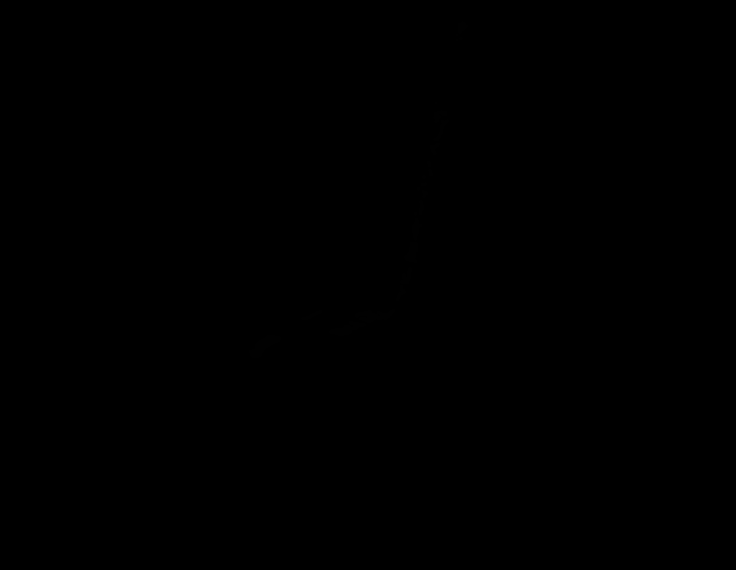

In [ ]:
image2

In [ ]:
fondo = np.zeros_like(data)
defectos = label(data)
props = regionprops(defectos)
print('Longitud de props', len(props))

Longitud de props 24


In [ ]:
np.count_nonzero(defectos != 0)

2003

In [ ]:
print(defectos.size)

419520


In [ ]:
contador = 0
tama = 10
for prop in props:
    if prop.area >= tama:
        contador +=1
print('Hay',contador,'defectos de mas de ', tama)

Hay 20 defectos de mas de  10


In [ ]:
nombreImagen = nombre[-16:-6]

for i in range(len(props)):
    fondo = np.zeros_like(data)
    defectos = label(data)
    props = regionprops(defectos)
    for j in range(len(props)):
        if(j != i):
            for x,y in (props[j].coords):
                defectos[x,y]=0

    propAparte = Image.fromarray(defectos.astype(bool))
    propAparte.save('./IMG/Máscaras individualesJ/'+nombreImagen+'_'+str(i)+'.png') 